<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_WOR_03_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


### About this workshop
We assume you can get started in Python with ease and that you’ve done the lecture and lab for this week and all previous weeks.
- Assumed skills
  - Manipulating data objects in Python
  - Executing functions in Python
  - Visualising results with `plotnine`
- Learning objectives
  - Understanding data related ethics
  - Identifying and understanding experimental design
  - Identifying data issues and how to fix them
  - Learning where and how to obtain online data
- Professional skills
  - Creating high quality graphics
  - Cleaning open source data
  - Merging and manipulating datasets

A reminder of expectations in the workshop:
- Keep a record of the work being completed, both the R script and this document
- Allow everyone a chance to participate in the workshop
- All opinions are valued provided they do not harm others
- Everyone is expected to help out with completing the work, learning seldom occurs by watching someone else do maths
- Shuffle the group around so that someone different is controlling Python


## Set up environment


In [48]:
# imports
import pandas as pd
import plotnine as p9
from plotnine import ggplot, aes, geom_point, xlab, ylab, scale_colour_discrete
import datetime

# dispaly all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Activity 1 - Design and Ethics



Burt (1966) published a study regarding the intellegince of twins reared together and apart. Burt was a well respected educational psychologist and statistician. Unfortunately, it was later discovered that Burt’s data was manufactured.

In Burt’s “study”, he considered monozygotic twins (i.e. identical twins). He reports the IQ of the twin raised by their biological parents, the IQ of a twin raised by foster parents, and the social class of the biological parents.

The Burt data from the carData package contains Burt’s fraudulent data. Real twin datasets exist, however their access requires ethics and requests.

**Discussion**: What are research ethics? Is it right that Burt manufactured data? What should Burt have done? What ethics do you need to uphold throughout your careers? Summarise your responses below.

**Answer**: QUT’s Office of Research Ethics and Integrity (OREI) provides a good definition of research ethics and integrity (https://www.qut.edu.au/research/why-qut/ethics-and-integrity).

It is unethical for Burt to have manufactured data.

If the research was conducted today, Burt should have developed an experimental design and submitted a proposal to his institution’s ethics committee for peer review.
Following approval, Burt should have provided a participant sheet and details of ethics approval to any participants. Burt should have actually collected data from his participants, rather than fabricating the data. Burt’s data should then be made available (anonymised) so that other researchers could replicate his statistical analysis.

There are a range of ethics that should be upheld in different careers. Some include honesty, rigour, transparency, fairness, and respect.


**Exercise:** Load the `Burt` data from the `carData` package. Provide a data dictionary containing information on each of the variables.

**Answer:**

In [5]:
# Get the Burt data set and make a data dictionary for it
# Burt data available at https://vincentarelbundock.github.io/Rdatasets/csv/carData/Burt.csv
# Desc at https://vincentarelbundock.github.io/Rdatasets/doc/carData/Burt.html

url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Burt.csv"
Burt = pd.read_csv(url)
Burt.dtypes
Burt

rownames     int64
IQbio        int64
IQfoster     int64
class       object
dtype: object

,rownames,IQbio,IQfoster,class
0,1,82,82,high
1,2,80,90,high
2,3,88,91,high
3,4,108,115,high
4,5,116,115,high
5,6,117,129,high
6,7,132,131,high
7,8,71,78,medium
8,9,75,79,medium
9,10,93,82,medium


**Exercise:** Create a graphically excellent plot that shows the data in the `Burt` dataset.

**Answer:**

In [9]:
# Convert the "class" column to be a factor (Categorical) and reorder the levels
Burt["class"] = pd.Categorical(Burt['class'], categories=['low','medium','high'], ordered=True)
Burt["class"].dtype


CategoricalDtype(categories=['low', 'medium', 'high'], ordered=True)

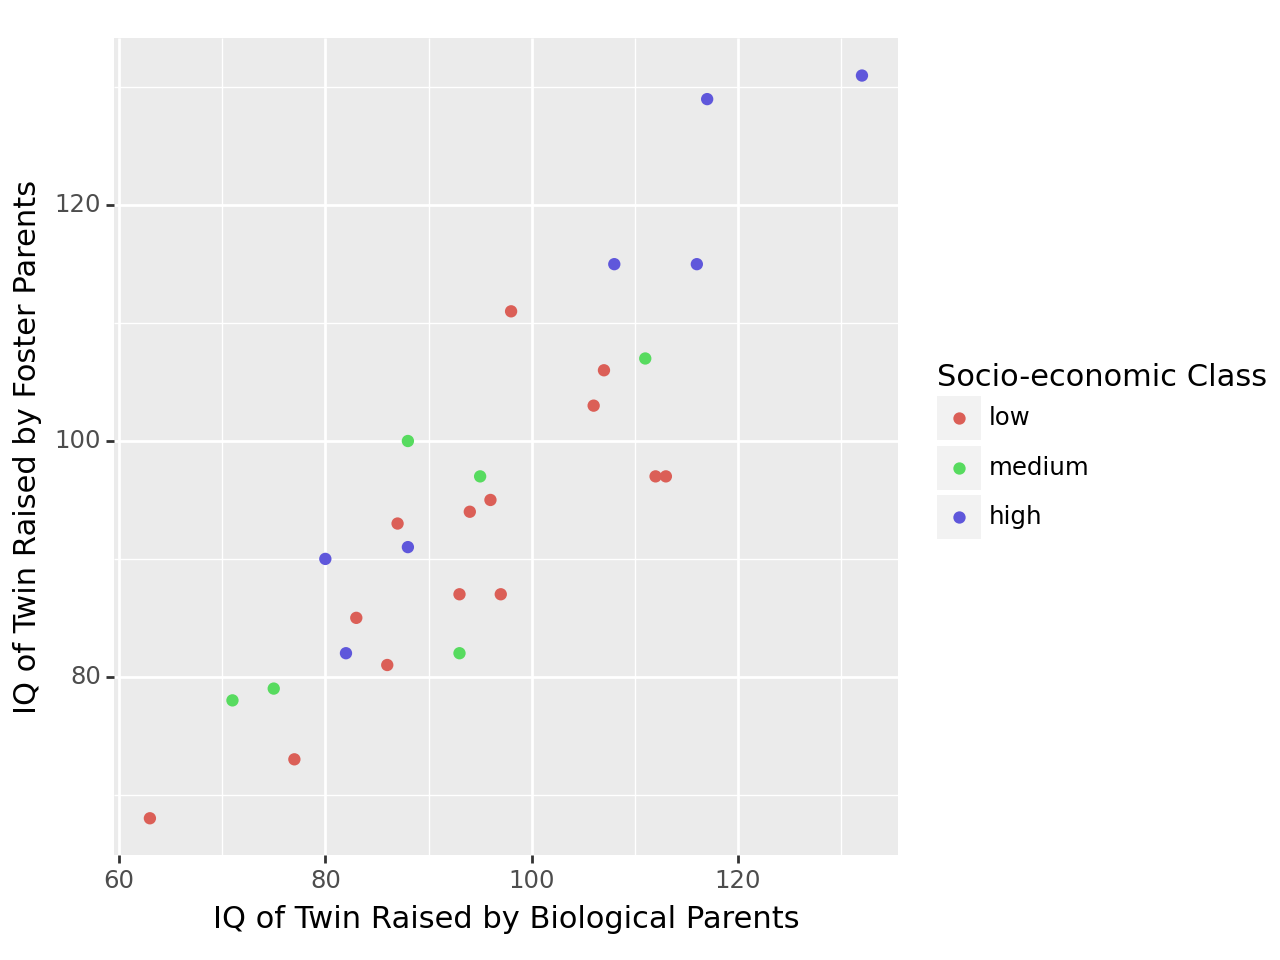

<Figure Size: (640 x 480)>

In [14]:
p = (
    ggplot(Burt, aes(x="IQbio", y="IQfoster", color="class"))
    + geom_point()
    + xlab("IQ of Twin Raised by Biological Parents")
    + ylab("IQ of Twin Raised by Foster Parents")
    + scale_colour_discrete(name = "Socio-economic Class")
)
p

**Exercise:** Based on the information available, describe Burt's study using the terms you learnt in the lecture (e.g. observational vs experimental, design, bias, confounding).

**Answer:** This is an observational study with a matched pairs design. The observational units are the children. There are two explanatory variables: the set of parents that raise the child, and the socio-economic status of the children.


# Activity 2 - Online Data and Data Cleaning

In this activity, you will obtain an open dataset on Vessels at Berth in Queensland. The Queensland Government and Maritime Safety Queensland keeps records of ship movements and vessels at berth in Queensland ports. This data is accessible via https://qships.tmr.qld.gov.au/webx/


**Exercise:** Go to the qships website and export the Vessels at Berth data to an Excel file. Open this Excel file, save as a CSV file, then import into your notebook.

(If this didn't work for you on the day, download the "In Port.csv" file from Canvas).

**Exercise:** Create a data dictionary containing information on each of the variables in the dataset. Include a column to indicate the class of each variable in the data frame.

**Answer:**

In [36]:
# Get the data and check the column types
AtBerth = pd.read_csv("In Port.csv")
AtBerth.dtypes
AtBerth

Arr Date    object
Dep Date    object
Ship        object
Berth       object
Port        object
Agent       object
To          object
dtype: object

,Arr Date,Dep Date,Ship,Berth,Port,Agent,To
0,Fri 01 Mar 2024 00:08,NaN,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
1,Fri 01 Mar 2024 00:08,NaN,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
2,Fri 01 Mar 2024 04:00,Sun 17 Mar 2024 18:30,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot ...,Abbot Point To Be Confirmed
3,Fri 01 Mar 2024 05:53,Mon 08 Apr 2024 12:34,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal
4,Fri 01 Mar 2024 15:36,Fri 15 Mar 2024 12:34,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal
...,...,...,...,...,...,...,...
351,Wed 29 Jun 2022 07:02,NaN,MAX HOOPER,Townsville 09,Townsville,Port of Townsville Limited,NaN
352,Wed 29 Nov 2023 23:15,NaN,MASTEKA 2,Rivergate Yacht Marina,Brisbane,Major Yacht Services (Brisbane),NaN
353,Wed 30 Aug 2023 15:00,NaN,HMAS BENALLA,Admiralty Anchorage,Cairns,Royal Australian Navy,NaN
354,Wed 31 Jan 2024 18:24,Sat 16 Mar 2024 00:00,WUNMA,Century/Bull Export Wharf,Karumba,P&O Maritime Karumba,SEA


**Exercise:** How many (distinct) ships are currently at berth in Queensland ports?

**Answer:**

In [37]:
# How many (distinct) ships are currently at berth in Queensland ports?
AtBerth["Ship"].nunique()

354

In [38]:
# How many (distinct) ships are currently at berth at each of the ports in Queensland?
# AtBerth %>%
#   group_by(Port) %>%
#   summarise(Ships = n_distinct(Ship))
AtBerth.groupby("Port")["Ship"].nunique()


Port
Abbot Point          5
Amrun                1
Brisbane           101
Bundaberg            5
Cairns              51
Gladstone           49
Hay Point           61
Karumba              2
Mackay               1
Port Alma            3
Skardon River       14
Southport            8
Thursday Island      5
Townsville          22
Weipa               17
Whitsunday           9
Name: Ship, dtype: int64

**Exercise:** Using the `to_datetime` function, convert the arrival and departure times in your data frame to dates. Note that you will be required to specify the **current** format of your dates, if `pandas` can't work it out automatically (it can).

**Answer:**

In [39]:
# Convert the date columns in place
AtBerth.head() # before
AtBerth["Arr Date"] = pd.to_datetime(AtBerth["Arr Date"],)
AtBerth["Dep Date"] = pd.to_datetime(AtBerth["Dep Date"],)
AtBerth.head() # after


,Arr Date,Dep Date,Ship,Berth,Port,Agent,To
0,Fri 01 Mar 2024 00:08,NaN,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
1,Fri 01 Mar 2024 00:08,NaN,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
2,Fri 01 Mar 2024 04:00,Sun 17 Mar 2024 18:30,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot ...,Abbot Point To Be Confirmed
3,Fri 01 Mar 2024 05:53,Mon 08 Apr 2024 12:34,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal
4,Fri 01 Mar 2024 15:36,Fri 15 Mar 2024 12:34,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal


,Arr Date,Dep Date,Ship,Berth,Port,Agent,To
0,2024-03-01 00:08:00,NaT,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
1,2024-03-01 00:08:00,NaT,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN
2,2024-03-01 04:00:00,2024-03-17 18:30:00,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot ...,Abbot Point To Be Confirmed
3,2024-03-01 05:53:00,2024-04-08 12:34:00,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal
4,2024-03-01 15:36:00,2024-03-15 12:34:00,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal


**Exercise:** Create a new column in the data frame that contains information on the amount of time each ship has been waiting so far.

**Answer:**

In [49]:
# Calculate the number of days each ship has been waiting at berth
AtBerth['Days at berth'] = (datetime.datetime.now() - AtBerth['Arr Date']).dt.days
AtBerth.head()

,Arr Date,Dep Date,Ship,Berth,Port,Agent,To,Waiting,Days at berth
0,2024-03-01 00:08:00,NaT,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN,15 days 11:22:28.017626,15
1,2024-03-01 00:08:00,NaT,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN,15 days 11:22:28.017626,15
2,2024-03-01 04:00:00,2024-03-17 18:30:00,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot ...,Abbot Point To Be Confirmed,15 days 07:30:28.017626,15
3,2024-03-01 05:53:00,2024-04-08 12:34:00,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,15 days 05:37:28.017626,15
4,2024-03-01 15:36:00,2024-03-15 12:34:00,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal,14 days 19:54:28.017626,14


# Activity 3 - Data Merging and Visualisation

In this portion of the workshop, you will use the `PortInfo.csv` file from Canvas to get additional understanding of the current state of the ports.


**Exercise:** Download `PortInfo.csv` from Canvas and use `read_csv()` to read the data into your notebook.

**Exercise:** Examine your data. Are there any meaningless variables or duplicate entries? Are the variables stored as appropriate classes? If these issues exist, clean up your dataset. Describe your actions in the answer section.

**Answer:**



In [51]:
# read in the data
PortInfo = pd.read_csv('PortInfo.csv')
PortInfo.dtypes
PortInfo

Port Name           object
State/Territory     object
Latitude           float64
Longitude          float64
Contact             object
Port Type           object
dtype: object

,Port Name,State/Territory,Latitude,Longitude,Contact,Port Type
0,Port Kennedy,QLD,-10.582469,142.220078,NaN,PortType.EOP
1,Brisbane,QLD,-27.441422,153.068364,http://www.portbris.com.au,PortType.MAJOR
2,Cairns,QLD,-16.928907,145.780197,http://www.cairnsport.com.au,PortType.MAJOR
3,Bowen,QLD,-20.066667,148.350000,http://www.pcq.com.au,PortType.MINOR
4,Bundaberg,QLD,-24.750000,152.400000,http://www.portofbundaberg.com.au,PortType.MINOR
5,Gladstone,QLD,-23.833333,151.583333,http://www.gpcl.com.au,PortType.MINOR
6,Hay Point,QLD,-21.216667,149.333333,http://www.pcq.com.au,PortType.MINOR
7,Karumba,QLD,-17.466667,140.833333,http://www.pcq.com.au,PortType.MINOR
8,Lockhart River,QLD,-12.795229,143.359708,http://www.cairnsport.com.au,PortType.MINOR
9,Mackay,QLD,-21.166667,149.233333,http://www.mackayports.com,PortType.MINOR


**Exercise:** Create a data dictionary that contains the information on each of the variables in the PortInfo dataset.

**Answer:**

**Exercise:** The text in the `Port Type` column unecessarily contains "PortType." before stating port type of EOP, Minor, Major, or Resticted. Use the `strip()` method to remove the leading "PortType.".


**Answer:**

In [57]:
# strip the leading "PortType." in place
PortInfo["Port Type"] = PortInfo["Port Type"].str.strip("PortType.")
PortInfo.head()

,Port Name,State/Territory,Latitude,Longitude,Contact,Port Type
0,Port Kennedy,QLD,-10.582469,142.220078,NaN,EO
1,Brisbane,QLD,-27.441422,153.068364,http://www.portbris.com.au,MAJOR
2,Cairns,QLD,-16.928907,145.780197,http://www.cairnsport.com.au,MAJOR
3,Bowen,QLD,-20.066667,148.350000,http://www.pcq.com.au,MINOR
4,Bundaberg,QLD,-24.750000,152.400000,http://www.portofbundaberg.com.au,MINOR


**Exercise:** Merge the columns of your "In Port" dataframe with your "Port Info" dataframe such that all entries in "In Port" remain. Include your code below. What is the key?

**Answer:**

In [61]:
# We need to do a left join - left is AtBerth and right is PortInfo
# Be careful to specify "left" in merge(), since it defaults to "inner"
AllPort = AtBerth.merge(PortInfo, how = 'left', left_on="Port", right_on="Port Name")
AllPort.head()

,Arr Date,Dep Date,Ship,Berth,Port,Agent,To,Waiting,Days at berth,Port Name,State/Territory,Latitude,Longitude,Contact,Port Type
0,2024-03-01 00:08:00,NaT,NORMAN RIVER,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN,15 days 11:22:28.017626,15,Cairns,QLD,-16.928907,145.780197,http://www.cairnsport.com.au,MAJOR
1,2024-03-01 00:08:00,NaT,CHRYSUS,Admiralty Anchorage,Cairns,Sea Swift Pty Ltd,NaN,15 days 11:22:28.017626,15,Cairns,QLD,-16.928907,145.780197,http://www.cairnsport.com.au,MAJOR
2,2024-03-01 04:00:00,2024-03-17 18:30:00,PESCADORES SW,Abbot Point Anchorage 01,Abbot Point,Monson Agencies Australia (Townsville & Abbot ...,Abbot Point To Be Confirmed,15 days 07:30:28.017626,15,Abbot Point,QLD,-19.875900,148.081500,NaN,MAJOR
3,2024-03-01 05:53:00,2024-04-08 12:34:00,YASA EMERALD,East Anchorage 9,Gladstone,Monson Agencies Australia (Gladstone),Clinton Coal,15 days 05:37:28.017626,15,Gladstone,QLD,-23.833333,151.583333,http://www.gpcl.com.au,MINOR
4,2024-03-01 15:36:00,2024-03-15 12:34:00,AZUL HARMONY,North Anchorage 5,Gladstone,Gulf Agency Company (Gladstone),Clinton Coal,14 days 19:54:28.017626,14,Gladstone,QLD,-23.833333,151.583333,http://www.gpcl.com.au,MINOR


**Exercise:** With the `ggmap` library, use the following code to create a map of Queensland. Note that the zoom argument can be modified, but higher levels of zoom will take more time and memory.

**NOTE**: Haven't worked out a Python solution for this one yet, anyone interested can check out Leaflet and/or Google Map based solutions and let me know!